In [3]:
import matplotlib.pylab as plt   # That gives plotting, and the next line makes plots appear inline in notebook
%matplotlib inline 
plt.rcParams['figure.dpi']=150  #that makes plots higher res (and bigger)

import numpy as np  # That gives numerical arrays and tools for manipulating them

## Euler's Method for RC circuit with Input Currents

In [4]:
#euler method simulator -- setup

deltat=0.2 #timestep
Tmax=10

tlist=np.linspace(0,Tmax,int(Tmax/deltat +1))
Vlist=np.zeros(len(tlist))

#initialize
V0=0
Vlist[0]=V0

Define input currents, simulate, and plot

C:\Users\Bwa\AppData\Local\Temp/ipykernel_7600/3264864131.py:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(tlist,Vlist,'.-',linewidth = 2, MarkerSize=16, label = "Euler Approx")
C:\Users\Bwa\AppData\Local\Temp/ipykernel_7600/3264864131.py:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('t', Fontsize = 12)
C:\Users\Bwa\AppData\Local\Temp/ipykernel_7600/3264864131.py:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('V(t)', Fontsize = 12)
C:\Users\Bwa\AppData\Local\Temp/ipykernel_7600/3264864131.py:26: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(tlist,Iapplist,'-',LineWidth=2)
C:\Users\B

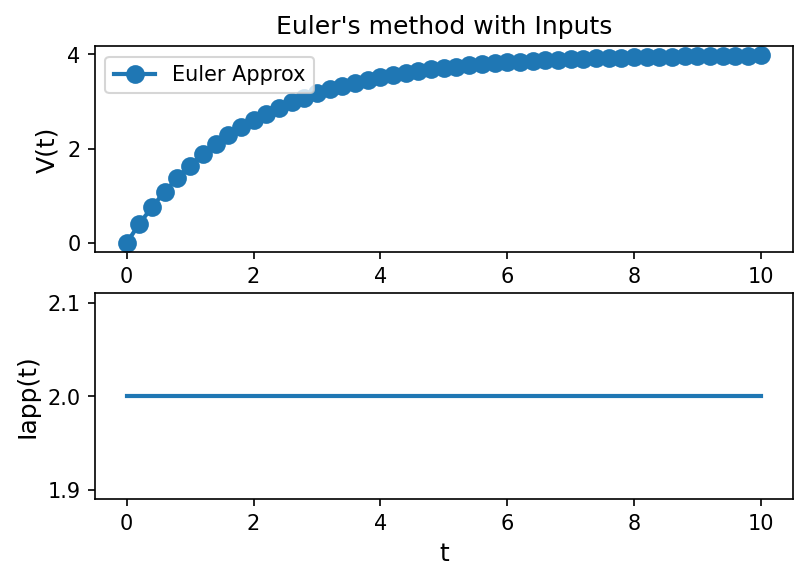

In [5]:
#define input currents
Iapplist=2*np.ones(len(tlist))
#Iapplist=np.sin(tlist)
#Iapplist=np.ones(len(tlist))+np.sin(tlist)


#circuit parameters
R=2
C=1


for i in range(len(tlist)-1):
    t=tlist[i]
    Vlist[i+1]=Vlist[i] + (-Vlist[i]/(R*C) + Iapplist[i]/C )*deltat;



plt.subplot(2,1,1)
plt.plot(tlist,Vlist,'.-',linewidth = 2, MarkerSize=16, label = "Euler Approx")
plt.xlabel('t', Fontsize = 12)
plt.ylabel('V(t)', Fontsize = 12)
plt.title("Euler's method with Inputs")
plt.legend()

plt.subplot(2,1,2)
plt.plot(tlist,Iapplist,'-',LineWidth=2)
plt.xlabel('t',Fontsize = 12)
plt.ylabel('Iapp(t)',Fontsize = 12); 

plt.show()

### Euler's Method with 2 Input Currents -- testing superposition (success)

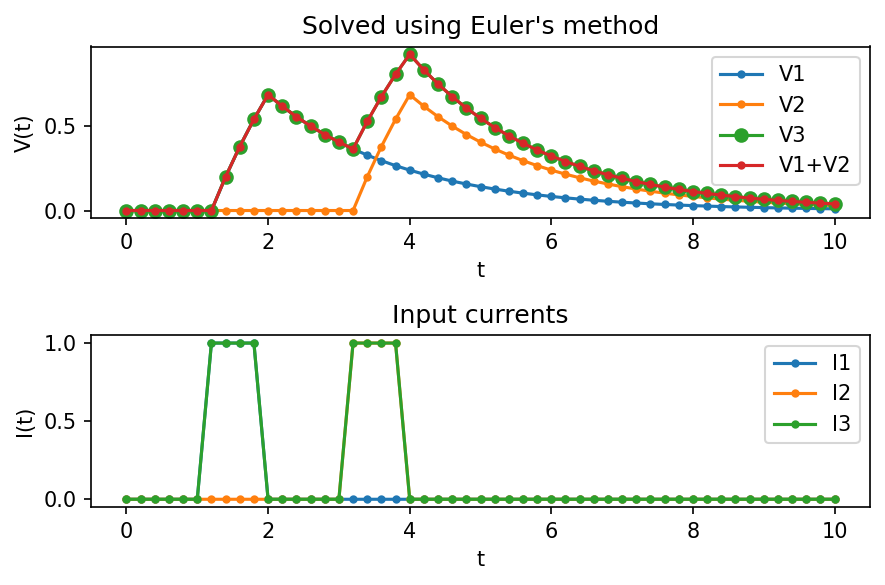

In [6]:
#euler method simulator

deltat=0.2 #timestep
Tmax=10

tlist=np.linspace(0,Tmax,int(Tmax/deltat +1))

#to test linearity, we will solve our system 3 times!
Vlist1=np.zeros(len(tlist))
Vlist2=np.zeros(len(tlist))
Vlist3=np.zeros(len(tlist))


#initialize
V0=0 
Vlist1[0]=V0
Vlist2[0]=V0
Vlist3[0]=V0


#define input currents

#Way 1:  general test of linearity
#Iapplist1=np.ones(len(tlist))
#Iapplist2=np.sin(tlist)
#Iapplist3=Iapplist1+Iapplist2

#Way 2:  successive input impulses:  watch them summate LINEARLY over time
Iapplist1=np.zeros(len(tlist))
T1=1
T2=2
Iapplist1[np.where(np.logical_and((tlist>T1), (tlist<T2)))]=1
Iapplist2=np.zeros(len(tlist))
T3=3
T4=4
Iapplist2[np.where(np.logical_and((tlist>T3), (tlist<T4)))]=1 
Iapplist3=Iapplist1+Iapplist2


#circuit parameters
R=2
C=1


for i in range(len(tlist)-1):
    t=tlist[i]
    Vlist1[i+1]=Vlist1[i] + (-Vlist1[i]/(R*C) + Iapplist1[i]/C )*deltat
    Vlist2[i+1]=Vlist2[i] + (-Vlist2[i]/(R*C) + Iapplist2[i]/C )*deltat
    Vlist3[i+1]=Vlist3[i] + (-Vlist3[i]/(R*C) + Iapplist3[i]/C )*deltat


plt.subplot(2,1,1)
plt.plot(tlist,Vlist1,'.-',label = "V1")
plt.plot(tlist,Vlist2,'.-',label = "V2")
plt.plot(tlist,Vlist3,'o-',label = "V3")
plt.plot(tlist,Vlist1+Vlist2,'.-', label = "V1+V2")
plt.xlabel('t')
plt.ylabel('V(t)')
plt.title("Solved using Euler's method")
plt.legend()

plt.subplot(212)
plt.plot(tlist,Iapplist1,'.-',label = "I1")
plt.plot(tlist,Iapplist2,'.-',label = "I2")
plt.plot(tlist,Iapplist3,'.-',label = "I3")
plt.xlabel('t')
plt.ylabel('I(t)')
plt.title("Input currents")
plt.legend()

plt.tight_layout()
plt.show()

## Euler's Method with 2 Input Conductances -- showing failure of superposition

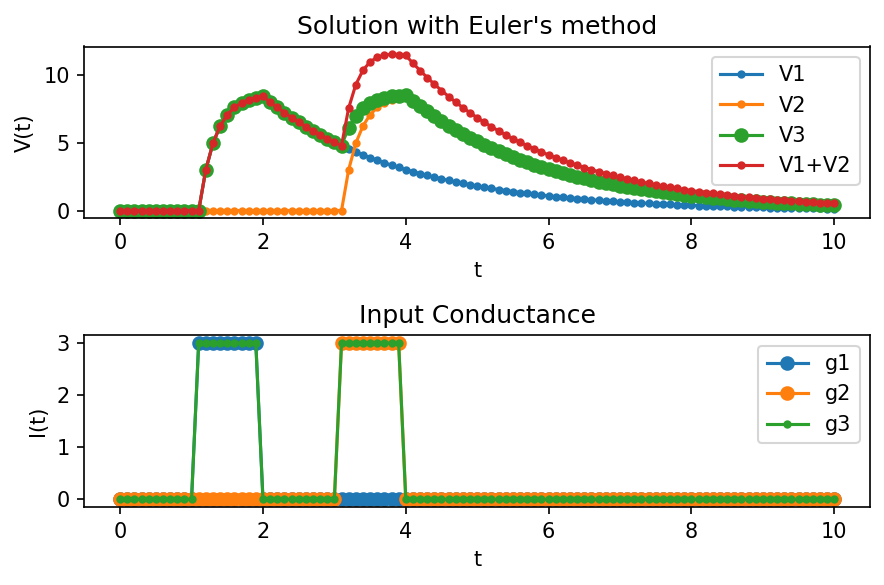

In [7]:
deltat=0.1 #timestep
Tmax=10

tlist=np.linspace(0,Tmax,int(Tmax/deltat +1))

#to test linearity, we will solve our system 3 times!
Vlist1=np.zeros(len(tlist))
Vlist2=np.zeros(len(tlist))
Vlist3=np.zeros(len(tlist))


#initialize
V0=0 
Vlist1[0]=V0
Vlist2[0]=V0
Vlist3[0]=V0


#define input CONDUCTANCES

# successive input impulses:  watch them summate NONLINEARLY over time
gapplist1=np.zeros(len(tlist))
T1=1
T2=2
gapplist1[np.where(np.logical_and((tlist>T1), (tlist<T2)))]=3
gapplist2=np.zeros(len(tlist))
T3=3
T4=4
gapplist2[np.where(np.logical_and((tlist>T3), (tlist<T4)))]=3
gapplist3=gapplist1+gapplist2


#synaptic reversal potential E
E=10

#circuit parameters
R=2
C=1


for i in range(len(tlist)-1):
    t=tlist[i]
    Vlist1[i+1]=Vlist1[i] + (-Vlist1[i]/(R*C) + gapplist1[i]*(E-Vlist1[i]/C ))*deltat
    Vlist2[i+1]=Vlist2[i] + (-Vlist2[i]/(R*C) + gapplist2[i]*(E-Vlist2[i]/C ))*deltat
    Vlist3[i+1]=Vlist3[i] + (-Vlist3[i]/(R*C) + gapplist3[i]*(E-Vlist3[i]/C ))*deltat


plt.subplot(211)
plt.plot(tlist,Vlist1,'.-',label = "V1")
plt.plot(tlist,Vlist2,'.-',label = "V2")
plt.plot(tlist,Vlist3,'o-',label = "V3")
plt.plot(tlist,Vlist1+Vlist2,'.-',label = "V1+V2")
plt.xlabel('t')
plt.ylabel('V(t)')
plt.title("Solution with Euler's method")
plt.legend()

plt.subplot(212)
plt.plot(tlist,gapplist1,'o-',label = "g1")
plt.plot(tlist,gapplist2,'o-',label = "g2")
plt.plot(tlist,gapplist3,'.-',label = "g3")
plt.xlabel('t')
plt.ylabel('I(t)') 
plt.title("Input Conductance")
plt.legend()
         
         
plt.tight_layout()
plt.show()